# Script contents:
1. Importing libraries and dataframe
2. The elbow techniquw
3. k-means clustering

### 1. Importing libraries and dataframe

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
#for the created graphs to be displayed in the notebook
%matplotlib inline

In [3]:
path=r'C:\Users\akul_\OneDrive\Documents\Tarishi\CF Data analysis bootcamp\Achievement 6\Global aqi and respiratory health outcomes'

In [4]:
df_aqi=df_aqi=pd.read_csv(os.path.join(path, 'Data', 'Prepared data', 'air_quality_cleaned.csv'),index_col=False)

In [5]:
df_aqi.head()

,city,date,aqi,pm2_5,pm10,no2,o3,temperature,humidity,hospital_admissions,population_density,hospital_capacity
0,Los Angeles,2020-01-01,65,34.0,52.7,2.2,38.5,33.5,33,5,Rural,1337
1,Beijing,2020-01-02,137,33.7,31.5,36.7,27.5,-1.6,32,4,Urban,1545
2,London,2020-01-03,266,43.0,59.6,30.4,57.3,36.4,25,10,Suburban,1539
3,Mexico City,2020-01-04,293,33.7,37.9,12.3,42.7,-1.0,67,10,Urban,552
4,Delhi,2020-01-05,493,50.3,34.8,31.2,35.6,33.5,72,9,Suburban,1631


In [6]:
## there were multiple index columns which needed to be dropped 
df_aqi = df_aqi.loc[:, ~df_aqi.columns.str.contains('^Unnamed')]

In [7]:
df_aqi.head()

,city,date,aqi,pm2_5,pm10,no2,o3,temperature,humidity,hospital_admissions,population_density,hospital_capacity
0,Los Angeles,2020-01-01,65,34.0,52.7,2.2,38.5,33.5,33,5,Rural,1337
1,Beijing,2020-01-02,137,33.7,31.5,36.7,27.5,-1.6,32,4,Urban,1545
2,London,2020-01-03,266,43.0,59.6,30.4,57.3,36.4,25,10,Suburban,1539
3,Mexico City,2020-01-04,293,33.7,37.9,12.3,42.7,-1.0,67,10,Urban,552
4,Delhi,2020-01-05,493,50.3,34.8,31.2,35.6,33.5,72,9,Suburban,1631


In [8]:
df_aqi.shape

(2192, 12)

In [9]:
## creating a new dataframe without categorical varaibles
df_num= df_aqi.select_dtypes(include='number')

In [10]:
df_num.columns

Index(['aqi', 'pm2_5', 'pm10', 'no2', 'o3', 'temperature', 'humidity',
       'hospital_admissions', 'hospital_capacity'],
      dtype='object')

In [11]:
df_num.shape

(2192, 9)

### 2. The elbow technique

In [12]:
cluster_range = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in cluster_range] 

In [13]:
score = [kmeans[i].fit(df_num).score(df_num) for i in range(len(kmeans))] # Creates a score that represents a rate of variation for the given cluster option.

In [14]:
score

[-738868650.2199183,
 -221797934.94931147,
 -125722012.2585411,
 -92135328.74329454,
 -76003912.63649334,
 -67317036.82867937,
 -62630431.49585479,
 -51935208.69612708,
 -46120751.408344686]

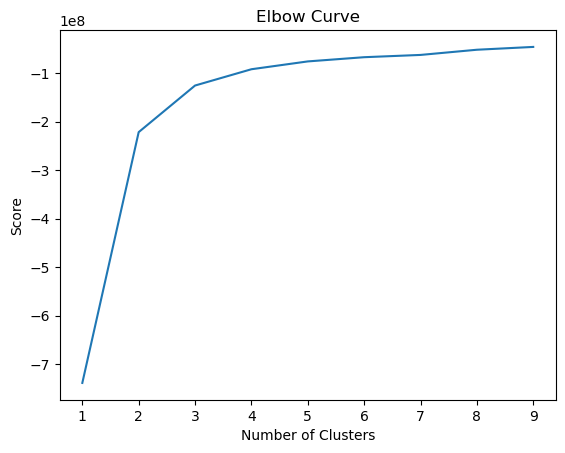

In [15]:
# Plot the elbow curve 

pl.plot(cluster_range,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### The optimal count for clusters is 3 since beyond that the graph flattens.  

### 3. k means clustering

In [16]:
k_means=KMeans(n_clusters=3)

In [17]:
# Fit the k-means object to the data.

k_means.fit(df_num)

KMeans(n_clusters=3)

In [18]:
df_num['clusters'] = k_means.fit_predict(df_num)

In [19]:
df_num.head()

,aqi,pm2_5,pm10,no2,o3,temperature,humidity,hospital_admissions,hospital_capacity,clusters
0,65,34.0,52.7,2.2,38.5,33.5,33,5,1337,2
1,137,33.7,31.5,36.7,27.5,-1.6,32,4,1545,0
2,266,43.0,59.6,30.4,57.3,36.4,25,10,1539,0
3,293,33.7,37.9,12.3,42.7,-1.0,67,10,552,1
4,493,50.3,34.8,31.2,35.6,33.5,72,9,1631,0


In [20]:
df_num['clusters'].value_counts()

clusters
1    750
0    733
2    709
Name: count, dtype: int64

In [21]:
df_num['clusters'].value_counts()

clusters
1    750
0    733
2    709
Name: count, dtype: int64

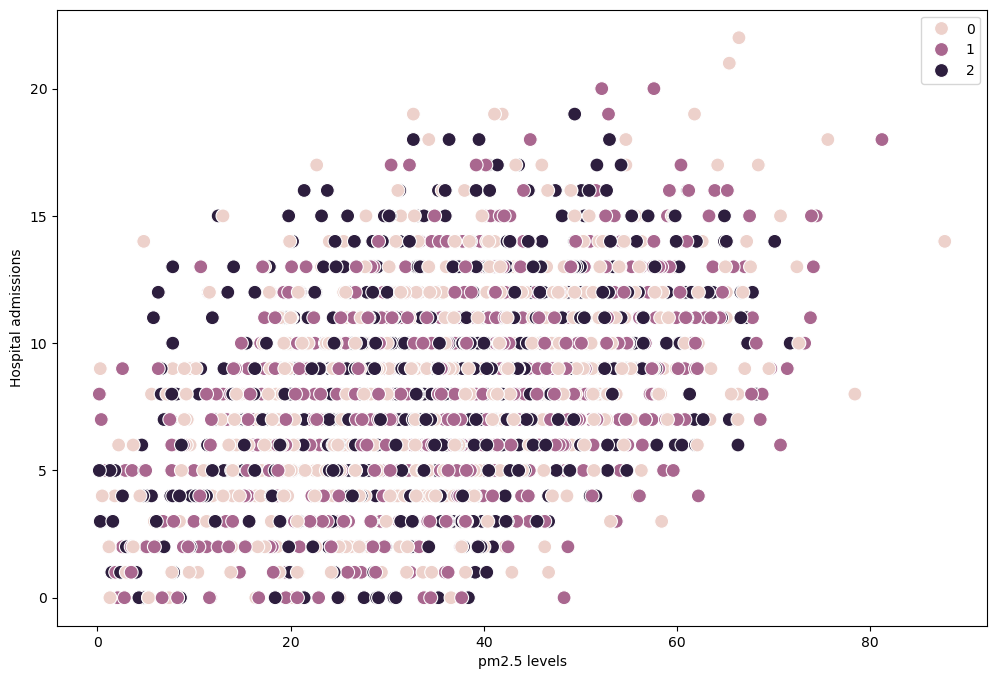

In [22]:
# Plot the clusters for the "hopsital admissions" and "pm2.5" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['pm2_5'], y=df_num['hospital_admissions'], hue=k_means.labels_, s=100)

ax.grid(False) # This removes the grid from the background.
plt.xlabel('pm2.5 levels') 
plt.ylabel('Hospital admissions') # Label y-axis.
plt.show()

#### There are no distinct clusters seen in the plot. All the clusters are overlapping each other indicating no apparent correlation between the two variables. It was already clear in the linear regression model that was created in the last task. Pm2.5 alone is not enough to determine if hospital admissions rise or not. 

#### Still, to interpret the scatterplot, pm2.5 values above 40 have slightly higher hospital admissions. There are few extreme values for cluster label 0 (light pink), where hospital admissions are very high with high pm2.5 values. 

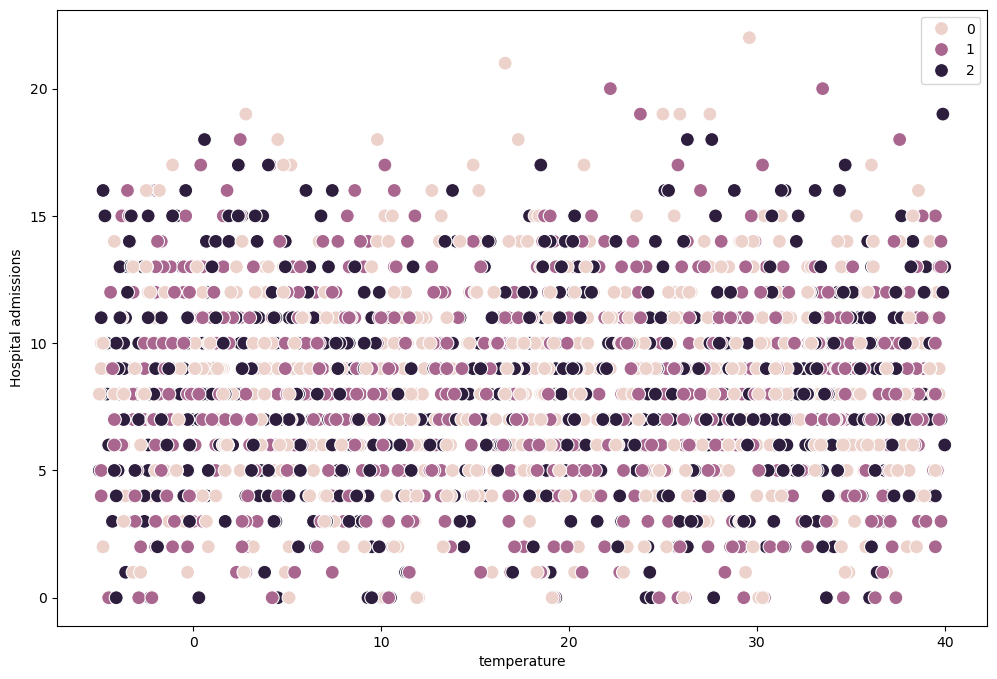

In [23]:
# Plot the clusters for the "hospital admissions" and "temperature" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['temperature'], y=df_num['hospital_admissions'], hue=k_means.labels_, s=100)

ax.grid(False) # This removes the grid from the background.
plt.xlabel('temperature') 
plt.ylabel('Hospital admissions') # Label y-axis.
plt.show()

#### There is no defined pattern or correlation between temperature and hospitalization. 

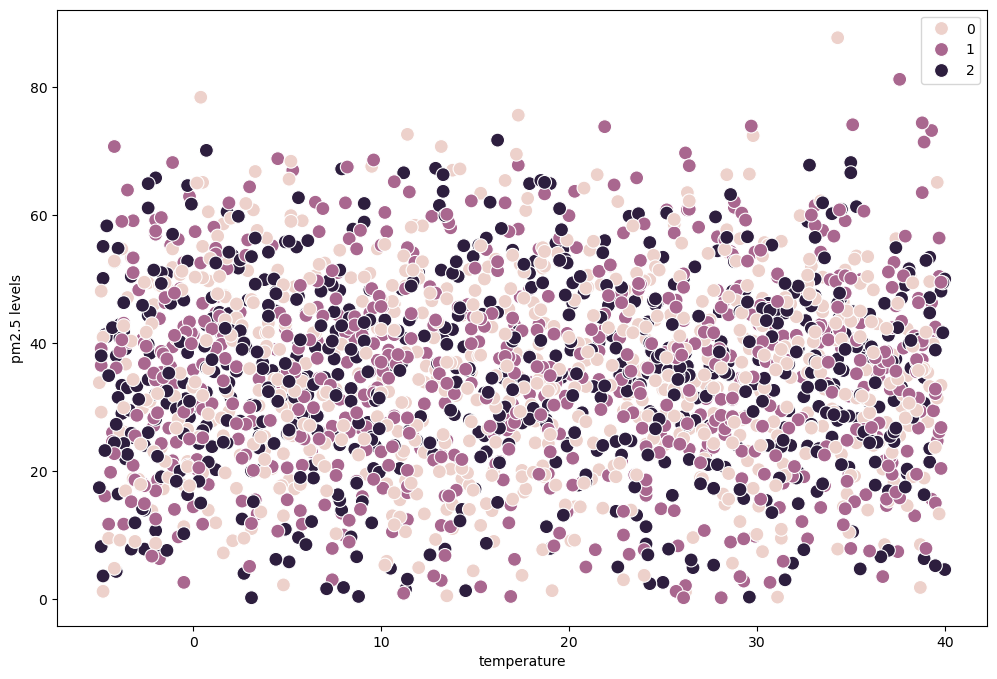

In [24]:
# Plot the clusters for the "pm2.5" and "temperature" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['temperature'], y=df_num['pm2_5'], hue=k_means.labels_, s=100)

ax.grid(False) # This removes the grid from the background.
plt.xlabel('temperature') 
plt.ylabel('pm2.5 levels') # Label y-axis.
plt.show()

#### I wanted to see if pm2.5 levels get affected by temperature or not. The scatterplot does not show any apparent correlation. The pink cluster have the highest density of data points and few extreme values. But it does not define any meaningful relationship. 

In [25]:
##  reallocating names to the cluster colors
df_num.loc[df_num['clusters'] == 2, 'cluster'] = 'dark purple'
df_num.loc[df_num['clusters'] == 1, 'cluster'] = 'purple'
df_num.loc[df_num['clusters'] == 0, 'cluster'] = 'pink'

In [26]:
df_num.groupby('cluster').agg({'aqi':['mean', 'median'], 
                         'pm2_5':['mean', 'median'], 
                         'pm10':['mean', 'median'],
                         'temperature':['mean','median'],
                          'hospital_admissions':['mean', 'median']})

aqi             pm2_5              pm10         \
                   mean median       mean median       mean median   
cluster                                                              
dark purple  248.857546  250.0  34.661495   34.9  51.193230   51.0   
pink         252.032742  255.0  35.164666   34.6  50.694679   49.9   
purple       250.270667  254.0  34.943600   35.4  50.999867   51.7   

            temperature        hospital_admissions         
                   mean median                mean median  
cluster                                                    
dark purple   16.944429  16.80            8.211566    8.0  
pink          17.896453  17.90            8.158254    8.0  
purple        17.477067  16.95            8.012000    8.0

#### Looking at the cluster values and aggregate of other variables, there is not a significant difference between the clusters. The pink clusters labeled as 0 have slightly higher mean for all aqi, pm2.5 and temperature. 

#### This model with single pm2.5 variable as the predictor is not enough to analyse hospital admissions. Maybe all the air quality indicators could be combined and then put into a new model. Another way to look at it is by conducting a city wise comparison. 

In [27]:
## city names can be mapped to their country
city_to_country = {
'Delhi': 'India',
'Beijing': 'China',
'Mexico City': 'Mexico',
'Los Angeles': 'United States',
'London': 'United Kingdom',
'Tokyo': 'Japan',
'Cairo': 'Egypt',
'São Paulo': 'Brazil'
}

In [28]:
## add the country column to the dataframe
df_aqi['name'] = df_aqi['city'].map(city_to_country) ## the column exists as "name" in the JSON file

In [30]:
df_aqi.head()

,city,date,aqi,pm2_5,pm10,no2,o3,temperature,humidity,hospital_admissions,population_density,hospital_capacity,name
0,Los Angeles,2020-01-01,65,34.0,52.7,2.2,38.5,33.5,33,5,Rural,1337,United States
1,Beijing,2020-01-02,137,33.7,31.5,36.7,27.5,-1.6,32,4,Urban,1545,China
2,London,2020-01-03,266,43.0,59.6,30.4,57.3,36.4,25,10,Suburban,1539,United Kingdom
3,Mexico City,2020-01-04,293,33.7,37.9,12.3,42.7,-1.0,67,10,Urban,552,Mexico
4,Delhi,2020-01-05,493,50.3,34.8,31.2,35.6,33.5,72,9,Suburban,1631,India


In [29]:
# export the data 
df_aqi.to_csv(os.path.join(path,'Data','Prepared data', 'air_quality_cleaned.csv'),index=False)